In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Only read up to 4096 bytes, > 4096 has 100% malware rate
MAX_SIZE = 4096
TOTAL_ROWS = 113636
USE_COLS = list(range(2, MAX_SIZE))
# Change this to test
ROWS = 20000

x_train = pd.read_csv("./data/train.zip", nrows=ROWS, usecols=USE_COLS, header=None, names = list(range(0, MAX_SIZE)))
x_train = np.array(x_train)
# x_train = sc.fit_transform(x_train)
y_train = pd.read_csv("./data/train_label.csv", usecols=[1], nrows=ROWS)
y_train = np.reshape(np.array(y_train), ROWS)

# train = train.fillna(0, downcast='infer')
assert x_train.shape[0] == y_train.shape[0], "Train and label shapes are different"

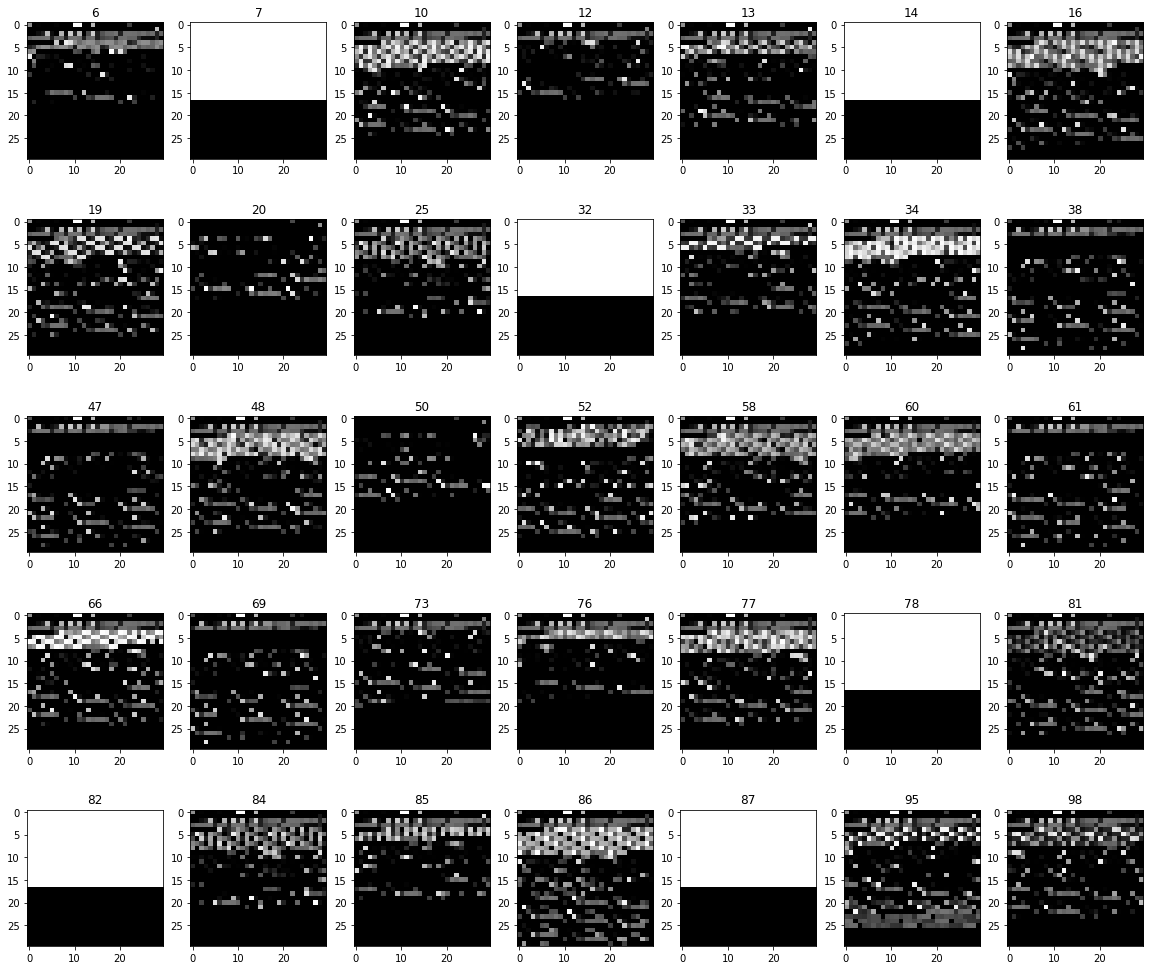

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Size the plot appropriately for online display
plt.rcParams['figure.figsize'] = (12.0, 10.0)

to_display_x = 5
to_display_y = 7
fig=plt.figure(figsize=(to_display_x * 4, to_display_y * 2.5))
n = 1

for i in range(ROWS):
    if n > to_display_x * to_display_y:
        break
    if y_train[i] == 0:
        im = x_train[i, 0: 900].astype(int)
        im = im.reshape(30, 30)
        a = fig.add_subplot(to_display_x, to_display_y, n)
        n += 1
        a.set_title(i)
        plt.gray()
        plt.imshow(im)

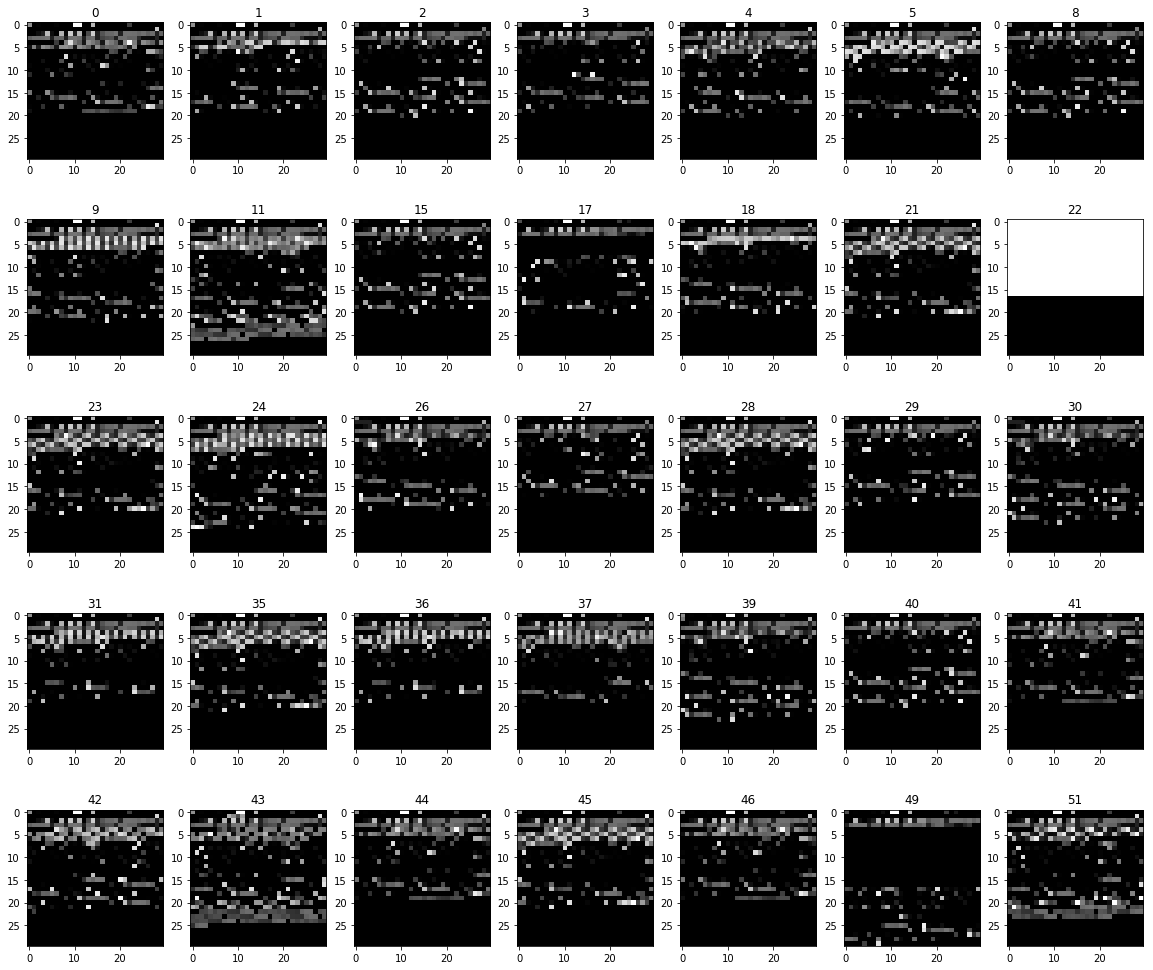

In [3]:
fig=plt.figure(figsize=(to_display_x * 4, to_display_y * 2.5))
n = 1

for i in range(ROWS):
    if n > to_display_x * to_display_y:
        break
    if y_train[i] == 1:
        im = x_train[i, 0: 900].astype(int)
        im = im.reshape(30, 30)
        a = fig.add_subplot(to_display_x, to_display_y, n)
        n += 1
        a.set_title(i)
        plt.gray()
        plt.imshow(im)

In [4]:
x_reshaped_train = np.zeros((x_train.shape[0], 30, 30, 1))

for i in range(x_train.shape[0]):
    x_reshaped_train[i] = x_train[i, 0: 900].astype(int).reshape(30, 30, 1)

In [5]:
print(x_reshaped_train.shape)

(20000, 30, 30, 1)


In [6]:
y_reshaped_train = np.zeros((y_train.shape[0], 2), dtype=int)
for i in range(y_train.shape[0]):
    if(y_train[i] == 0):
        y_reshaped_train[i] = [1, 0]
    else:
        y_reshaped_train[i] = [0, 1]


In [7]:
cnt = 0
for i in range(x_train.shape[0]):
    if(y_train[i] == 1):
        cnt += 1
        
print(cnt / 500)

24.928


In [8]:
# mask = np.random.rand(len(x_train)) < 0.8
# train = x_train
# label = y_train
# x_train = train[mask]
# y_train = label[mask]
# x_test = train[~mask]
# y_test = label[~mask]

In [9]:
num_classes = 2
import keras
from keras import Sequential
from keras.layers import *

batch_size = 32
epochs = 15


model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 1), strides=(1, 1),
                 activation='relu',
                 input_shape=(30, 30, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

model.fit(x_reshaped_train, y_reshaped_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
#           validation_data=(x_test, y_test),
#           callbacks=[history])



/home/kai/.local/share/virtualenvs/CS5242-xoh8m7DM/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/15
16160/20000 [=======================>......] - ETA: 37s - loss: 10.0234 - acc: 0.3778

KeyboardInterrupt: 

In [ ]:
model.save('cnn_model.h5')

In [ ]:
num_classes = 2
import keras
from keras import Sequential
from keras.layers import *

batch_size = 32
epochs = 15


model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 1), strides=(1, 1),
                 activation='relu',
                 input_shape=(30, 30, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

model.fit(x_reshaped_train, y_reshaped_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
#           validation_data=(x_test, y_test),
#           callbacks=[history])



In [ ]:
model.save('cnn_model2.h5')